# Assignment

In [10]:
import pandas as pd

## Q1

In [24]:
data=pd.read_csv("covid_19_country_wise_latest.csv")

In [25]:
data.head()

,Unnamed: 0,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,0,Afghanistan,36263,1269,25198,9796,106.0,10.0,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,1,Albania,4880,144,2745,1991,117.0,6.0,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,2,Algeria,27973,1163,18837,7973,616.0,8.0,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,3,Andorra,907,52,803,52,10.0,0.0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,4,Angola,950,41,242,667,18.0,1.0,0,4.32,25.47,16.94,749,201,26.84,Africa


## Q2

In [26]:
data.index=data["Unnamed: 0"]
data=data.drop(columns=["Unnamed: 0"])


## Q3

In [31]:
data.index.name="Index"

In [32]:
data.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
Index,,,,,,,,,,,,,,,
0,Afghanistan,36263,1269,25198,9796,106.0,10.0,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117.0,6.0,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616.0,8.0,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10.0,0.0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18.0,1.0,0,4.32,25.47,16.94,749,201,26.84,Africa


## Q 4

In [40]:
def space_to_under(col):
    return col.str.split().str.join("_")
    
data["WHO Region"]=space_to_under(data["WHO Region"])
data["Country/Region"]=space_to_under(data["Country/Region"])


In [43]:
data.sample(5)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
Index,,,,,,,,,,,,,,,
140,Saint_Kitts_and_Nevis,17,0,15,2,0.0,0.0,0,0.00,88.24,0.00,17,0,0.00,Americas
147,Serbia,24141,543,0,23598,411.0,9.0,0,2.25,0.00,inf,21253,2888,13.59,Europe
98,Liberia,1167,72,646,449,5.0,0.0,5,6.17,55.36,11.15,1107,60,5.42,Africa
109,Mauritania,6208,156,4653,1399,37.0,0.0,223,2.51,74.95,3.35,5923,285,4.81,Africa
168,Timor-Leste,24,0,0,24,0.0,0.0,0,0.00,0.00,0.00,24,0,0.00,South-East_Asia


## Q5

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    object 
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               177 non-null    float64
 6   New deaths              177 non-null    float64
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    object 

In [45]:
data.isnull().sum()

Country/Region             0
Confirmed                  0
Deaths                     0
Recovered                  0
Active                     0
New cases                 10
New deaths                10
New recovered              0
Deaths / 100 Cases         0
Recovered / 100 Cases      0
Deaths / 100 Recovered     0
Confirmed last week        0
1 week change              0
1 week % increase          0
WHO Region                 0
dtype: int64

## Q6

In [71]:
mean=data["New cases"].mean()
# data
data["New cases"].fillna(mean,inplace=True)

In [80]:
mean=data["New deaths"].mean()
data["New deaths"].fillna(mean,inplace=True)
#mean

C:\Users\ashan\AppData\Local\Temp\ipykernel_3536\3209271995.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["New deaths"].fillna(mean,inplace=True)


In [84]:
data.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

## Q7

In [90]:
print("Unique Countries are : ",len(data["Country/Region"].unique()))

Unique Countries are :  187


## Q8

In [95]:
data["Country/Region"].duplicated().sum()

0

## Q9

In [107]:
print("Standarad Deviation is : ",data.Confirmed.describe()["std"])
print("Mean is : ",data.Confirmed.mean())
print("Median is : ",data.Confirmed.median())

Standarad Deviation is :  383318.66383061546
Mean is :  88130.935828877
Median is :  5059.0


## Q10,Q11

In [133]:
import numpy as np
def str_to_int(x):
    if x.isnumeric():
        return int(x)
    return np.nan
data.Deaths=data.Deaths.apply(str_to_int)


    

In [135]:
data.Deaths.fillna(data.Deaths.mean(),inplace=True)

In [136]:
data.Deaths

Index
0      1269.000000
1       144.000000
2      1163.000000
3        52.000000
4        41.000000
          ...     
182      78.000000
183       1.000000
184     483.000000
185     140.000000
186    3516.129032
Name: Deaths, Length: 187, dtype: float64

## Q12,13,14

In [138]:

print("Total Death : ",int(data.Deaths.sum()))
print("Total Recovered : ",data.Recovered.sum())


Total Death :  657516
Total Recovered :  9468087


In [143]:
country=data["Country/Region"][data.Confirmed>=1000000]
print(country)
print("Countries that have more than 1 milllion test cases are: ",len(country))

Index
23     Brazil
79      India
173        US
Name: Country/Region, dtype: object
Countries that have more than 1 milllion test cases are:  3


In [146]:
data["Country/Region"][data.Recovered//data.Confirmed>0.95]

Index
49    Dominica
69     Grenada
75    Holy_See
Name: Country/Region, dtype: object

In [147]:
data.iloc[49]  #checking 

Country/Region            Dominica
Confirmed                       18
Deaths                         0.0
Recovered                       18
Active                           0
New cases                      0.0
New deaths                     0.0
New recovered                    0
Deaths / 100 Cases             0.0
Recovered / 100 Cases        100.0
Deaths / 100 Recovered         0.0
Confirmed last week             18
1 week change                    0
1 week % increase              0.0
WHO Region                Americas
Name: 49, dtype: object

## Q15

In [149]:
data.drop(columns=["WHO Region","Confirmed"])

,Country/Region,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
Index,,,,,,,,,,,,,
0,Afghanistan,1269.000000,25198,9796,106.0,10.0,18,3.50,69.49,5.04,35526,737,2.07
1,Albania,144.000000,2745,1991,117.0,6.0,63,2.95,56.25,5.25,4171,709,17.00
2,Algeria,1163.000000,18837,7973,616.0,8.0,749,4.16,67.34,6.17,23691,4282,18.07
3,Andorra,52.000000,803,52,10.0,0.0,0,5.73,88.53,6.48,884,23,2.60
4,Angola,41.000000,242,667,18.0,1.0,0,4.32,25.47,16.94,749,201,26.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West_Bank_and_Gaza,78.000000,3752,6791,152.0,2.0,0,0.73,35.33,2.08,8916,1705,19.12
183,Western_Sahara,1.000000,8,1,0.0,0.0,0,10.00,80.00,12.50,10,0,0.00
184,Yemen,483.000000,833,375,10.0,4.0,36,28.56,49.26,57.98,1619,72,4.45


## Q16

In [158]:
data["Country/Region"][data.Deaths==data.Deaths.max()]

Index
173    US
Name: Country/Region, dtype: object

## Q17,18,19

In [163]:
data.sort_values(by="Deaths",ascending=False)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
Index,,,,,,,,,,,,,,,
173,US,4290259,148011.0,1325804,2816444,56336.000000,1076.00000,27941,3.45,30.90,11.16,3834677,455582,11.88,Americas
23,Brazil,2442375,87618.0,1846641,508116,23284.000000,614.00000,33728,3.59,75.61,4.74,2118646,323729,15.28,Americas
177,United_Kingdom,301708,45844.0,1437,254427,688.000000,7.00000,3,15.19,0.48,3190.26,296944,4764,1.60,Europe
111,Mexico,395489,44022.0,303810,47657,4973.000000,342.00000,8588,11.13,76.82,14.49,349396,46093,13.19,Americas
85,Italy,246286,35112.0,198593,12581,168.000000,5.00000,147,14.26,80.64,17.68,244624,1662,0.68,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,Bhutan,99,0.0,86,13,1282.740113,30.40113,1,0.00,86.87,0.00,90,9,10.00,South-East_Asia
130,Papua_New_Guinea,62,0.0,11,51,0.000000,0.00000,0,0.00,17.74,0.00,19,43,226.32,Western_Pacific
75,Holy_See,12,0.0,12,0,0.000000,0.00000,0,0.00,100.00,0.00,12,0,0.00,Europe


In [164]:
data["Total Cases"]=data.Deaths+data.Recovered+data.Active

In [167]:
data["Death Rate"]=(data.Deaths/data.Confirmed)*100

In [170]:
data

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,Total Cases,Death Rate
Index,,,,,,,,,,,,,,,,,
0,Afghanistan,36263,1269.000000,25198,9796,106.0,10.0,18,3.50,69.49,5.04,35526,737,2.07,Eastern_Mediterranean,36263.000000,3.499435
1,Albania,4880,144.000000,2745,1991,117.0,6.0,63,2.95,56.25,5.25,4171,709,17.00,Europe,4880.000000,2.950820
2,Algeria,27973,1163.000000,18837,7973,616.0,8.0,749,4.16,67.34,6.17,23691,4282,18.07,Africa,27973.000000,4.157581
3,Andorra,907,52.000000,803,52,10.0,0.0,0,5.73,88.53,6.48,884,23,2.60,Europe,907.000000,5.733186
4,Angola,950,41.000000,242,667,18.0,1.0,0,4.32,25.47,16.94,749,201,26.84,Africa,950.000000,4.315789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West_Bank_and_Gaza,10621,78.000000,3752,6791,152.0,2.0,0,0.73,35.33,2.08,8916,1705,19.12,Eastern_Mediterranean,10621.000000,0.734394
183,Western_Sahara,10,1.000000,8,1,0.0,0.0,0,10.00,80.00,12.50,10,0,0.00,Africa,10.000000,10.000000
184,Yemen,1691,483.000000,833,375,10.0,4.0,36,28.56,49.26,57.98,1619,72,4.45,Eastern_Mediterranean,1691.000000,28.562980


## Q21

In [172]:
data.loc[:,["Country/Region","Death Rate"]].head()

,Country/Region,Death Rate
Index,,
0,Afghanistan,3.499435
1,Albania,2.950820
2,Algeria,4.157581
3,Andorra,5.733186
4,Angola,4.315789


<Axes: xlabel='Total Cases', ylabel='Deaths'>

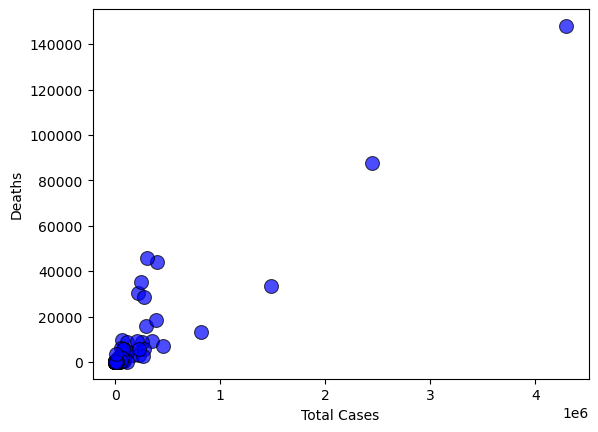

In [176]:
import seaborn as sns
sns.scatterplot(x=data["Total Cases"], y=data["Deaths"], color="blue", s=100, alpha=0.7, edgecolor="black")


In [177]:
data.to_csv("covid_worked_data.csv")